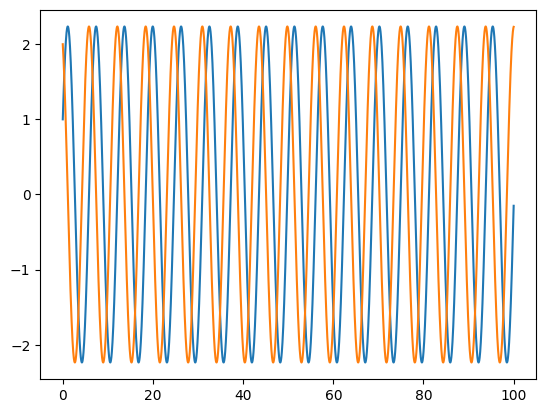

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

def sys(x, t, A):
    x1, x2 = x    
    dxdt = A @ x.reshape(2,1)
    return np.squeeze(np.asarray(dxdt))

A = np.array([[0, 1], [-1, 0]])


x0 = np.array([[1], [2]])

t = np.linspace(0, 100, 10000)

x0 = x0.reshape(-1)
sol = odeint(sys, x0, t, args=(A,))

ax = plt.axes()
ax.plot(t, sol)
plt.show()

c:\Users\avalon\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\avalon\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


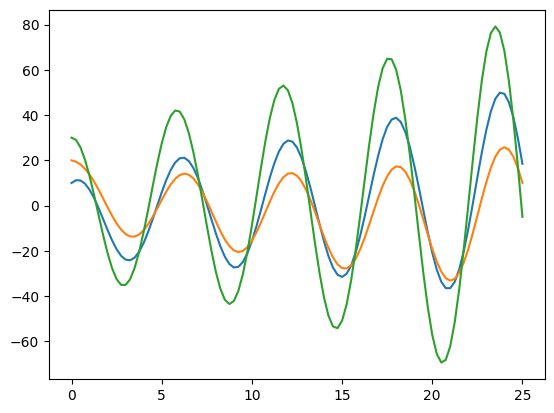

In [2]:
A = np.array([[-0.25 + 0.14j, 0, 0.33 + 0.44j],
              [0.25 + 0.58j, -0.2 + 0.14j, 0],
              [0, 0.2 + 0.4j, -0.1 + 0.97j]])

def deriv_vec(t, y):
    return A @ y
result = solve_ivp(deriv_vec, [0, 25],
                   np.array([10 + 0j, 20 + 0j, 30 + 0j]),
                   t_eval=np.linspace(0, 25, 101),dense_output=True)

t = np.linspace(0,25,101)
z = result.sol(t)

plt.plot(t, z.T)
plt.show()

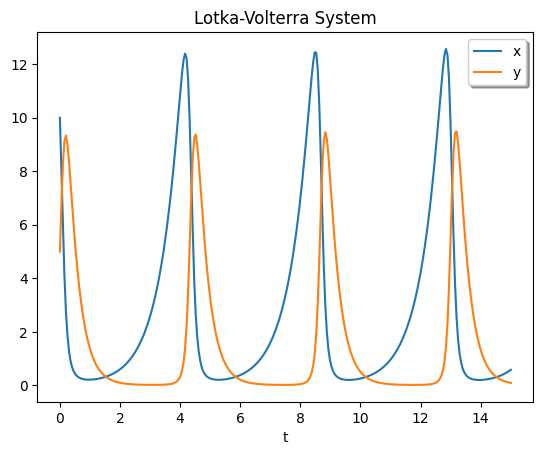

In [3]:
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

f = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1),
                dense_output=True)

t = np.linspace(0, 15, 300)
z = f.sol(t)

plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

enter entries row-wise
[[ 0.   -0.75 -0.75 -0.75 -1.5 ]
 [-1.5  -1.5  -0.75 -0.75 -0.75]
 [-0.75 -0.75  0.   -1.5  -0.75]
 [-0.75 -0.75 -0.75  0.   -1.5 ]
 [-0.75 -1.5  -1.5  -1.5   0.  ]]
0
[[ 0.41281139]
 [-0.01423488]
 [-0.09964413]
 [ 0.41281139]
 [ 0.24199288]]
[0.41281139]
[-0.01423488]
[-0.09964413]
[0.41281139]
[0.24199288]
1
[[-1.66533454e-16]
 [ 2.40506329e-01]
 [-5.18987342e-01]
 [ 7.34177215e-01]
 [ 3.16455696e-01]]
[0.1835443]
[0.24050633]
[-0.51898734]
[0.73417722]
[0.3164557]
2
[[ 0.41791045]
 [ 0.        ]
 [-0.11940299]
 [ 0.41791045]
 [ 0.23880597]]
[0.41791045]
[-0.02985075]
[-0.11940299]
[0.41791045]
[0.23880597]
3
[[ 2.24719101e-01]
 [ 8.98876404e-02]
 [-1.86094526e-16]
 [ 2.24719101e-01]
 [ 3.59550562e-01]]
[0.2247191]
[0.08988764]
[0.15730337]
[0.2247191]
[0.35955056]
4
[[ 1.02654867]
 [-0.3539823 ]
 [ 0.60176991]
 [ 0.        ]
 [-0.14159292]]
[1.02654867]
[-0.3539823]
[0.60176991]
[0.25663717]
[-0.14159292]
5
[[ 28.]
 [ -8.]
 [-56.]
 [ 28.]
 [  0.]]
[28.]
[-8.]

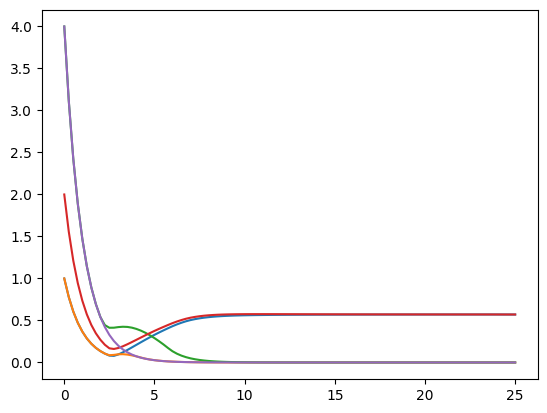

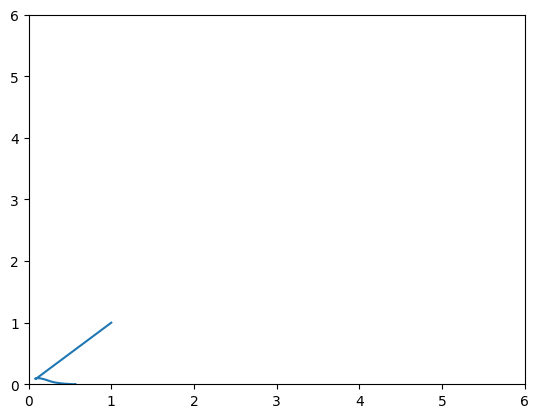

In [6]:
import numpy as np
import itertools as itt
import pandas as pd
import scipy as scp
import matplotlib.pyplot as plt

# parameters for eps, del, the
e = 0.25
d = 0.5
t = 1

# creating powersets function
def powerset(j):
    ps = [] # power set of parent set
    xs = np.arange(1,j+1)
    for i in range(0, j+1):
        for subset in itt.combinations(xs, i):
            ps.append(subset)
    return(ps)

# generating weight matrix function
def weight_matrix(r, c):
    w = []
    print('enter entries row-wise')
    for i in range(r):
        indiv_row = []    
        for j in range(c):
            indiv_row.append(int(input()))
        w.append(indiv_row)
    mat_w = np.array(w)

    w_mod = []
    for row in mat_w:
        w_mod_r = []
        for ent in row:
            if ent == 1:
                w_mod_r.append(-1+e)
                continue
            if ent == -1:
                w_mod_r.append(-1-d)
                continue
            else:
                w_mod_r.append(0)
        # print(w_mod_r)
        w_mod.append(w_mod_r)
    # mat_w_mod = np.array(w_mod)
    mat_w_mod = np.array(w_mod)
    return(mat_w_mod)

# checking fixed points
def check_fp(weight_matrix, fixed_point, theta):
    for i in range(matrix_size):
        Wx = weight_matrix[i,:]@fixed_point + theta[i]
        print(Wx)

#input weight matrix
matrix_size = int(input('matrix size?\n'))
W = weight_matrix(matrix_size, matrix_size)
#input powerset
ps = powerset(matrix_size)
# print(f'The relevant values of sigma are {ps}')
print(W)

# finding fixed points

A = np.copy(W)
for sigma in ps: # index of entry in power set
    W = np.copy(A) # weight matrix
    theta = np.ones((matrix_size, 1)) # theta
    t_s = np.copy(theta) # theta_sigma
    print(ps.index(sigma))
    deac_neur = ps[ps.index(sigma)] #deactivated neurons
    if sigma:
        for iter in deac_neur:
            W[iter-1, :] = 0
            inverse = np.linalg.inv(np.identity(matrix_size) - W)   
            t_s[iter-1, :] = 0
            P = np.matmul(inverse, t_s)
        print(P)
        check_fp(A, P, theta)

    else:
        inverse = np.linalg.inv(np.identity(matrix_size) - W)
        P = np.matmul(inverse, t_s)
        print(P)
        # what is even going on here
        check_fp(A, P, theta)
# print(W_s)


# mat_inverse_fp = np.linalg.inv(np.identity(matrix_size) - mat_w_mod)
# print(mat_inverse_fp)

# simulate ODE
# generate random matrix
# A - np.diag(np.diag(A))

# simulating ODE

def sys(t, x):
    # x1, x2 = x    
    dxdt = (-x + np.maximum(0, A@x + 1))
    return dxdt

for i in range(0,10):
    x0 = np.random.randint(5, size=(matrix_size, 1))
    time = [0, 100]

    x = scp.integrate.solve_ivp(sys, time, x0.flatten(), dense_output=True)
    t = np.linspace(0,25, 101)

    plot1 = plt.plot(t, (x.sol(t)).T)
    plt.show()
    plt.xlim([0,6])
    plt.ylim([0,6])
    plot2 = plt.plot(x.sol(t)[0], x.sol(t)[1])
plt.show()

[[ 0.   -1.5 ]
 [-0.75  0.  ]]
-2.25


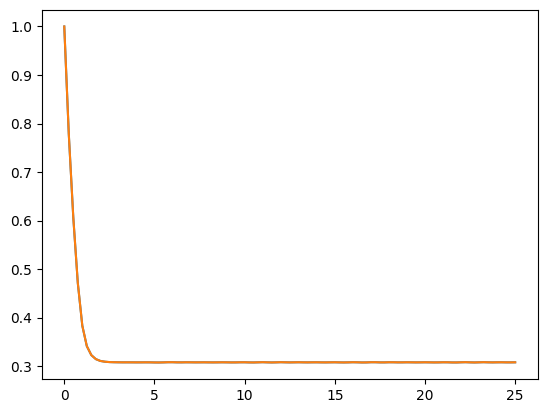

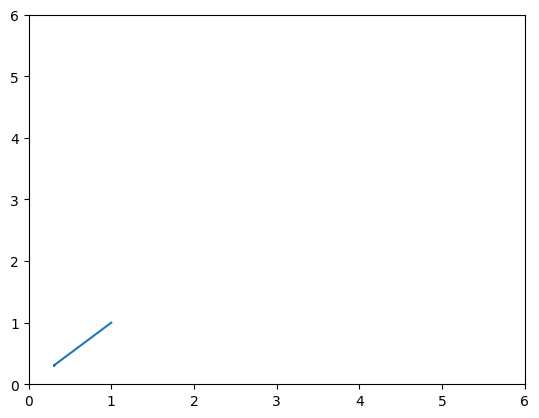

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

def sys(t, x):
    # x1, x2 = x    
    dxdt = (-x + max(0, np.sum(A@x) + 1))
    return dxdt

A = np.array([[0, -1.5], 
              [-0.75, 0]])
x0 = np.array([[1],[1]])
time = [0, 100]

x = scp.integrate.solve_ivp(sys, time, x0.flatten(), dense_output=True)
t = np.linspace(0,25, 101)

print(A)
print(np.sum(A@x0))
plot1 = plt.plot(t, (x.sol(t)).T)
plt.show()
plt.xlim([0,6])
plt.ylim([0,6])
plot2 = plt.plot(x.sol(t)[0], x.sol(t)[1])
plt.show()